### This analysis is based on the measurement of duration of float-to-float and int-to-int matrix multiplication with the dimension from 1 to 1000 with step 100.
Means and standard deviations are introduced in the lower table. Here is my tg for your feedback: https://t.me/latynina46

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from pylab import rcParams
%matplotlib inline

In [2]:
# returns the duration of float- or int-matrix multiplication 
def count_matrix(n, par='int'): 
    if par == 'int':
        a = np.random.randint(10, size=(n, n))
    if par == 'float':
        a = np.random.rand(n, n)
    start = time.time()
    res = np.matmul(a, a)
    final = time.time()-start
    return round(final, 8)

# returns 2 lists of durations from matrices in range(1 x 1 - m x m)
def timecount(m):
    int_times, times = [], []
    for i in range(1, m, 100):
        times.append(count_matrix(i, par='float'))
        int_times.append(count_matrix(i))
    return int_times, times

# writes dfs to excel for you not to wait for a long time
def excel_writer(df):
    df.to_excel('df_1000.xlsx')
    
# creates dataframe with matrix multiplication working time (for int and float)
def create_df(n):
    int_, float_ = timecount(n+1)
    
    dict_ = {f'speed_int_{n}': int_,
                 f'speed_float_{n}': float_}
    df = pd.DataFrame(dict_, index=(range(1,n+1, 100)))
    excel_writer(df)
    return df

In [3]:
# creates a dict with names of files as keys if files already exist OR creates dfs and writes them to excel
names = ['df_1000.xlsx']
d = {}
for name in names:
    if os.path.isfile(name):
        df_1000 = pd.read_excel(name)
    else:
        df_1000 = create_df(1000)

In [4]:
def complexity(df):
    cols = df.columns
    result = {}
    for col in cols:
        i = 1
        result[col] = []
        for i in df.index:
            if i == 901:
                break
            T2 = df[col][i+100]
            T1 = df[col][i]
            n = np.log2(T2/T1)/np.log2((i+100)/i)
            print('n is ', n, 'N is ', i, f'for {col}')
            result[col].append(n)
            i+=100
    return result

In [5]:
df_1000.head()

speed_float_1000  speed_int_1000
1            0.000008        0.000008
101          0.065338        0.001816
201          0.000942        0.020697
301          0.002676        0.065850
401          0.003407        0.112549

In [6]:
compl_1000 = complexity(df_1000)

n is  1.94886204256 N is  1 for speed_float_1000
n is  -6.16054544792 N is  101 for speed_float_1000
n is  2.58669591606 N is  201 for speed_float_1000
n is  0.841293100943 N is  301 for speed_float_1000
n is  4.48113125608 N is  401 for speed_float_1000
n is  5.94462644388 N is  501 for speed_float_1000
n is  -1.06354439332 N is  601 for speed_float_1000
n is  1.93249592908 N is  701 for speed_float_1000
n is  2.6967688322 N is  801 for speed_float_1000
n is  1.17902663572 N is  1 for speed_int_1000
n is  3.53585259916 N is  101 for speed_int_1000
n is  2.86624409465 N is  201 for speed_int_1000
n is  1.86860349417 N is  301 for speed_int_1000
n is  5.198640271 N is  401 for speed_int_1000
n is  6.98277767372 N is  501 for speed_int_1000
n is  2.3958285563 N is  601 for speed_int_1000
n is  3.02055665154 N is  701 for speed_int_1000
n is  3.38453002155 N is  801 for speed_int_1000


In [7]:
compl_1000

{'speed_float_1000': [1.9488620425551797,
  -6.1605454479174275,
  2.5866959160574488,
  0.84129310094273013,
  4.4811312560796885,
  5.9446264438793488,
  -1.0635443933222755,
  1.9324959290758517,
  2.696768832195152],
 'speed_int_1000': [1.1790266357212063,
  3.5358525991604619,
  2.8662440946538887,
  1.8686034941682004,
  5.1986402709975845,
  6.9827776737166207,
  2.395828556296244,
  3.0205566515394442,
  3.3845300215543568]}

In [8]:
def count_means_stds(compl_dict):
    df = pd.DataFrame(compl_dict)
    stat = pd.DataFrame(index=['float_1000', 'int_1000'])
    stat['Mean'] = [np.mean(df[column]) for column in df.columns]
    stat['Standard Deviation'] = [np.std(df[column]) for column in df.columns]
    return stat

print(count_means_stds(compl_1000))

                Mean  Standard Deviation
float_1000  1.467532            3.288425
int_1000    3.381340            1.660057


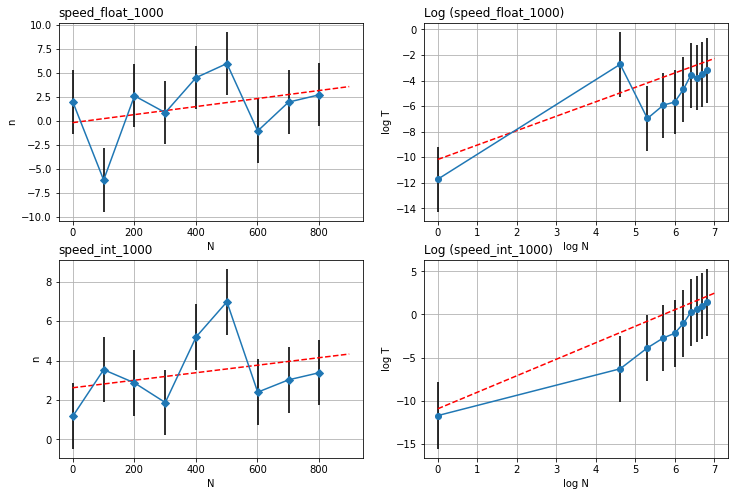

In [9]:
def enumerate2(xs, start=0, step=1):
    for x in xs:
        yield (start, x)
        start += step
rcParams['figure.figsize'] = 12,8        
for i, k in enumerate2(compl_1000.keys(), 1, 2):
    plt.subplot(2, 2, i)
    plt.errorbar(df_1000.index[:9], compl_1000[k], yerr=np.std(compl_1000[k]), 
                 fmt='-o', ecolor='k', elinewidth=1.6, marker='D')
    z = np.polyfit(df_1000.index[:9], compl_1000[k], 1)
    p = np.poly1d(z)
    plt.plot(p(range(1,900)), 'r--')
    plt.grid()
    plt.xlabel('N')
    plt.ylabel('n')
    plt.title(k, loc='left')
    
    plt.subplot(2, 2, i+1)
    log_N = [np.log(x) for x in df_1000.index]
    log_t = [np.log(x) for x in df_1000[k]]
    plt.errorbar(log_N, log_t, yerr=np.std(log_t), fmt='-o', ecolor='k', elinewidth=1.6)
    z = np.polyfit(log_N, log_t, 1)
    p = np.poly1d(z)
    plt.plot(p(range(1,9)), 'r--')
    plt.grid()
    plt.xlabel('log N')
    plt.ylabel('log T')
    plt.title(f'Log ({k})', loc='left')
plt.savefig('compl.png')
plt.savefig('complexity', format='eps')
plt.show()